AFFICHAGE DES IMAGES 

In [1]:
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
import numpy as np 

In [5]:
chemin_image = "/Users/simonboudara/dataset/PBC_dataset_normal_DIB/BA_47.jpg"

In [7]:
image = mpimg.imread(chemin_image)

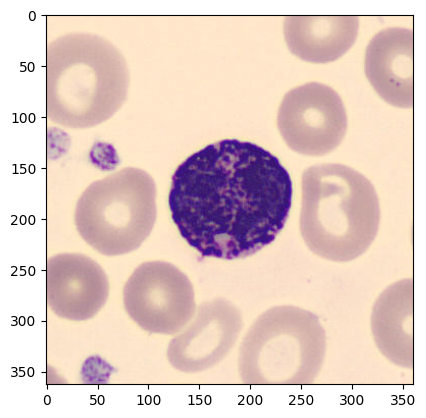

In [8]:
plt.imshow(image)
plt.show()

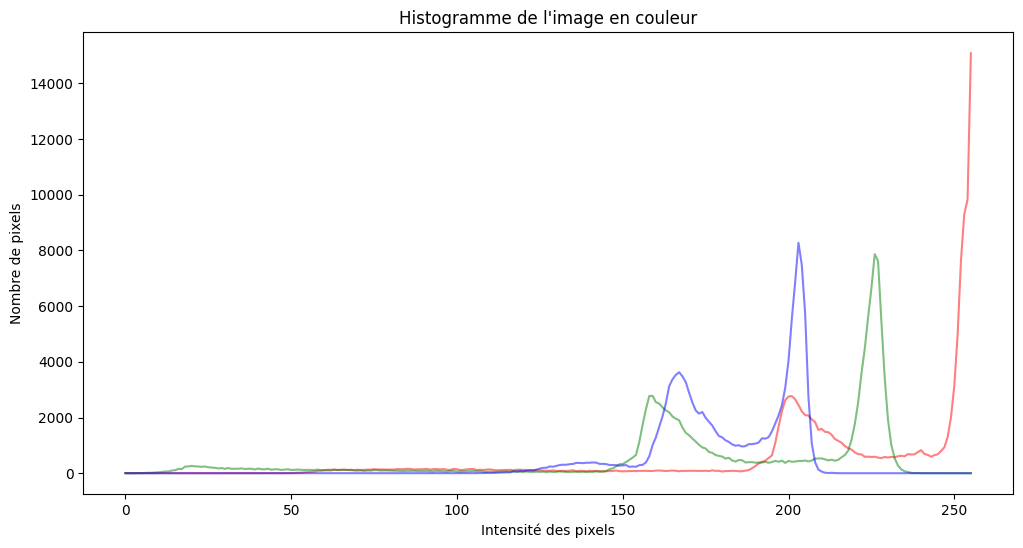

In [13]:
import matplotlib.pyplot as plt

# Créer l'histogramme
histogram_r, bins_r = np.histogram(image[:,:,0].ravel(), bins=256, range=[0,256])
histogram_g, bins_g = np.histogram(image[:,:,1].ravel(), bins=256, range=[0,256])
histogram_b, bins_b = np.histogram(image[:,:,2].ravel(), bins=256, range=[0,256])

# Afficher l'histogramme
plt.figure(figsize=(12, 6))
plt.plot(histogram_r, color='red', alpha=0.5)
plt.plot(histogram_g, color='green', alpha=0.5)
plt.plot(histogram_b, color='blue', alpha=0.5)
plt.title('Histogramme de l\'image en couleur')
plt.xlabel('Intensité des pixels')
plt.ylabel('Nombre de pixels')
plt.show()

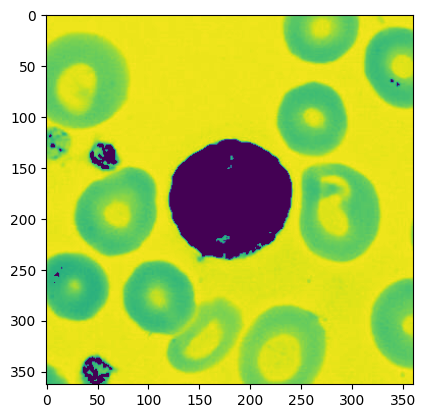

In [9]:
from PIL import Image

# Ouvrir l'image
image = Image.open("/Users/simonboudara/dataset/PBC_dataset_normal_DIB/BA_47.jpg")

# Convertir l'image en mode niveau de gris
image_grayscale = image.convert('L')

# Seuiller l'image pour garder les pixels au-dessus d'un certain seuil (par exemple, 128)
seuil = 150
image_seuillee = image_grayscale.point(lambda p: p if p > seuil else 0)

# Afficher l'image seuillée
plt.imshow(image_seuillee)

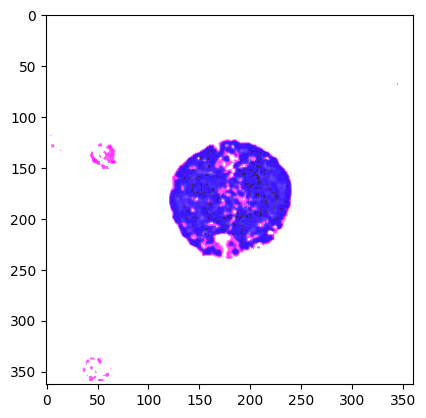

In [16]:
from PIL import Image

# Ouvrir l'image
image = Image.open("/Users/simonboudara/dataset/PBC_dataset_normal_DIB/BA_47.jpg")

# Convertir l'image en niveaux de gris
image_grayscale = image.convert('L')

# Appliquer le seuillage sur l'image en niveaux de gris
seuil = 110
image_seuillee = image_grayscale.point(lambda x: x if x < seuil else 255)

# Séparer les canaux RGB de l'image originale
r, g, b = image.split()

# Appliquer le seuillage sur chaque canal
r_seuille = r.point(lambda p: p if p < seuil else 255)
g_seuille = g.point(lambda p: p if p < seuil else 255)
b_seuille = b.point(lambda p: p if p < seuil else 255)

# Fusionner les canaux seuillés avec les canaux de l'image originale
image_seuillee = Image.merge('RGB', (r_seuille, g_seuille, b_seuille))

# Afficher l'image seuillée
plt.imshow(image_seuillee)

In [18]:
image_seuillee.mode == 'RGB'

True

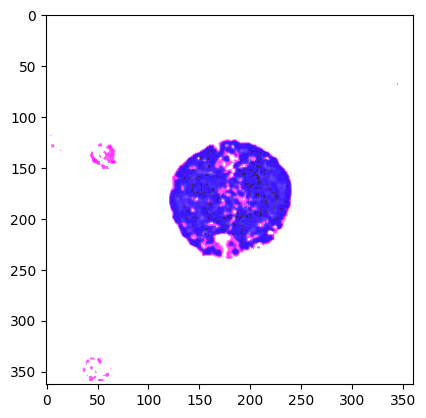

In [11]:
from PIL import Image

# Ouvrir l'image
image = Image.open("/Users/simonboudara/dataset/PBC_dataset_normal_DIB/BA_47.jpg")

# Convertir l'image en niveaux de gris
image_grayscale = image.convert('L')

# Appliquer le seuillage sur l'image en niveaux de gris
seuil = 110
image_seuillee = image_grayscale.point(lambda x: x if x < seuil else 255)

# Séparer les canaux RGB de l'image originale
r, g, b = image.split()

# Appliquer le seuillage sur chaque canal
r_seuille = r.point(lambda p: p if p < seuil else 255)
g_seuille = g.point(lambda p: p if p < seuil else 255)
b_seuille = b.point(lambda p: p if p < seuil else 255)

# Fusionner les canaux seuillés avec les canaux de l'image originale
image_seuillee = Image.merge('RGB', (r_seuille, g_seuille, b_seuille))

# Afficher l'image seuillée
plt.imshow(image_seuillee)

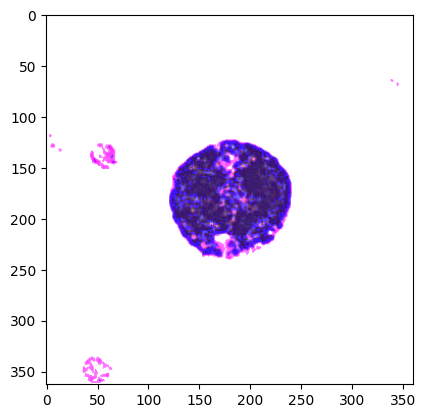

In [12]:
from PIL import Image

# Ouvrir l'image
image = Image.open("/Users/simonboudara/dataset/PBC_dataset_normal_DIB/BA_47.jpg")

# Convertir l'image en niveaux de gris
image_grayscale = image.convert('L')

# Appliquer le seuillage sur l'image en niveaux de gris
seuil = 130
image_seuillee = image_grayscale.point(lambda x: x if x < seuil else 255)

# Séparer les canaux RGB de l'image originale
r, g, b = image.split()

# Appliquer le seuillage sur chaque canal
r_seuille = r.point(lambda p: p if p < seuil else 255)
g_seuille = g.point(lambda p: p if p < seuil else 255)
b_seuille = b.point(lambda p: p if p < seuil else 255)

# Fusionner les canaux seuillés avec les canaux de l'image originale
image_seuillee = Image.merge('RGB', (r_seuille, g_seuille, b_seuille))

# Afficher l'image seuillée
plt.imshow(image_seuillee)
image_seuillee.show()

/Users/simonboudara/miniconda3/envs/Projet8/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


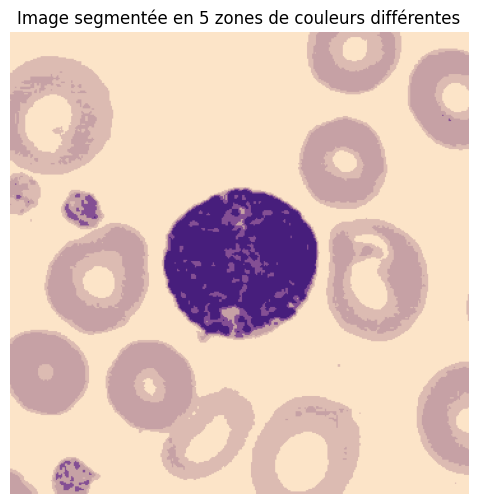

Nombre de zones de couleurs différentes dans l'image: 5


In [14]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.cluster import KMeans

# Charger l'image
image = cv2.imread("/Users/simonboudara/dataset/PBC_dataset_normal_DIB/BA_47.jpg")

# Convertir l'image de BGR à RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Redimensionner l'image si nécessaire pour accélérer le processus
# image = cv2.resize(image, (300, 300))

# Convertir l'image en une matrice 2D de pixels RGB
pixels = image.reshape((-1, 3))

# Définir le nombre de clusters (zones de couleurs différentes)
nombre_clusters = 5  # Vous pouvez ajuster ce paramètre selon votre image

# Appliquer l'algorithme de K-Means pour regrouper les pixels en clusters
kmeans = KMeans(n_clusters=nombre_clusters)
kmeans.fit(pixels)

# Obtenir les étiquettes de cluster pour chaque pixel
labels = kmeans.labels_

# Nombre de zones de couleurs différentes
nombre_zones = len(np.unique(labels))

# Afficher l'image originale avec les clusters colorés
cluster_centers = kmeans.cluster_centers_.astype(int)
segmented_image = cluster_centers[labels].reshape(image.shape)

plt.figure(figsize=(8, 6))
plt.imshow(segmented_image)
plt.axis('off')
plt.title("Image segmentée en {} zones de couleurs différentes".format(nombre_zones))
plt.show()

print("Nombre de zones de couleurs différentes dans l'image:", nombre_zones)

In [1]:
import numpy as np
import cv2

# Charger l'image en couleurs
image = cv2.imread('/Users/simonboudara/Documents/tmptf3wuxrg.PNG')

# Convertir l'image en niveaux de gris
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Appliquer un seuillage adaptatif pour obtenir un masque binaire
_, mask = cv2.threshold(image_gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Effectuer une opération de fermeture pour éliminer les petits trous dans le masque
kernel = np.ones((5,5), np.uint8)
mask_closed = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)

# Trouver les contours des zones significatives
contours, _ = cv2.findContours(mask_closed, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Dessiner les contours sur l'image originale
result = image.copy()
cv2.drawContours(result, contours, -1, (0, 255, 0), 2)

# Afficher l'image résultante
cv2.imshow('Result', result)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Afficher le nombre de zones significatives
print("Nombre de zones significatives:", len(contours))

Nombre de zones significatives: 1


In [15]:
from PIL import Image
import numpy as np

def moyenne_histogramme_couleurs(image_path):
    # Ouvrir l'image
    image = Image.open(image_path)
    
    # Convertir l'image en tableau numpy
    image_np = np.array(image)
    
    # Si l'image est en couleur (mode RGB)
    if image.mode == 'RGB':
        # Calculer l'histogramme pour chaque canal de couleur (R, G, B)
        hist_r = np.histogram(image_np[:,:,0], bins=256, range=(0, 256))[0]
        hist_g = np.histogram(image_np[:,:,1], bins=256, range=(0, 256))[0]
        hist_b = np.histogram(image_np[:,:,2], bins=256, range=(0, 256))[0]

        # Calculer la moyenne pour chaque canal
        mean_r = np.mean(hist_r)
        mean_g = np.mean(hist_g)
        mean_b = np.mean(hist_b)
        
        return {'Moyenne Rouge': mean_r, 'Moyenne Vert': mean_g, 'Moyenne Bleu': mean_b}
    
    # Si l'image est en niveaux de gris (mode L)
    elif image.mode == 'L':
        hist_gray = np.histogram(image_np, bins=256, range=(0, 256))[0]
        mean_gray = np.mean(hist_gray)
        
        return {'Moyenne Niveau de Gris': mean_gray}
    
    else:
        raise ValueError("Le mode de l'image n'est pas supporté. Utilisez une image en mode RGB ou L.")

# Exemple d'utilisation
image_path = "/Users/simonboudara/dataset/PBC_dataset_normal_DIB/BA_47.jpg"  # Remplacez par le chemin de votre image
resultat = moyenne_histogramme_couleurs(image_path)
print(resultat)

{'Moyenne Rouge': 510.46875, 'Moyenne Vert': 510.46875, 'Moyenne Bleu': 510.46875}
